## importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing dataset and creating X and Y

In [2]:
df=pd.read_csv('train.csv')
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

## imputing:

In [3]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
x=si.fit_transform(x)

## Feature Scaling

## Splitting into train and test set

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

## LR model

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred=lr.predict(x_test)

## plotting predicted vs actual values

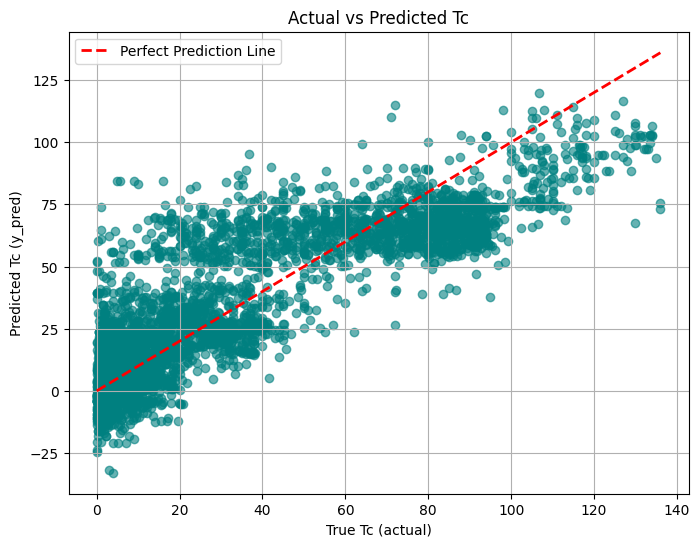

In [33]:
actual=sc_y.inverse_transform(y_test)
predicted=sc_y.inverse_transform(y_pred)
plt.figure(figsize=(8,6))
plt.scatter(actual, predicted, alpha=0.6, color='teal')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel("True Tc (actual)")
plt.ylabel("Predicted Tc (y_pred)")
plt.title("Actual vs Predicted Tc")
plt.legend()
plt.grid(True)
plt.show()

## R2 and RMSE:

In [34]:
from sklearn.metrics import r2_score,root_mean_squared_error
r2=r2_score(y_true=actual,y_pred=predicted)
print(r2)

0.7350976364618504


In [35]:
rmse=root_mean_squared_error(y_true=actual,y_pred=predicted)
print(rmse)

17.559079451644354


## with PCA

In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.39019986 0.1042054  0.0953871  0.07934556 0.05822511 0.03770805
 0.03631953 0.0309735  0.02370823 0.01966187 0.01828411 0.0146574
 0.01174232 0.00996182 0.00987848 0.00790938 0.0072004 ]


## LR model with PCA

In [37]:
from sklearn.linear_model import LinearRegression
lr_pca=LinearRegression()
lr_pca.fit(x_train_pca,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred_pca=lr_pca.predict(x_test_pca)

## Plotting actual vs predicted values

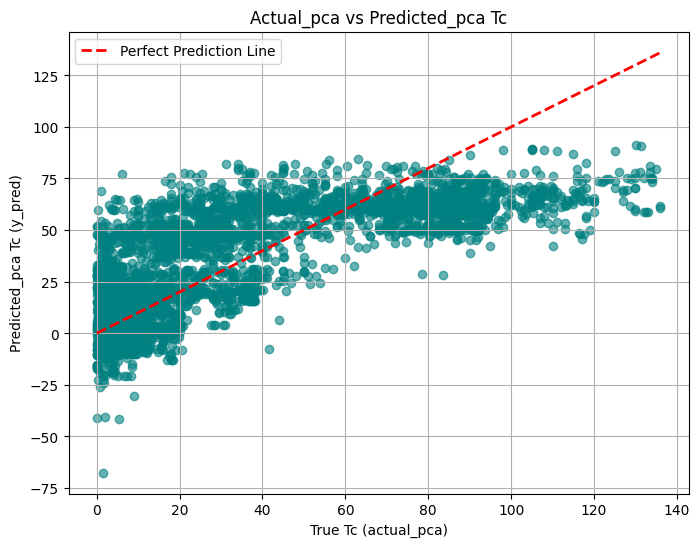

In [39]:
actual_pca=sc_y.inverse_transform(y_test)
predicted_pca=sc_y.inverse_transform(y_pred_pca)
plt.figure(figsize=(8,6))
plt.scatter(actual_pca, predicted_pca, alpha=0.6, color='teal')
plt.plot([actual_pca.min(), actual_pca.max()], [actual_pca.min(), actual_pca.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel("True Tc (actual_pca)")
plt.ylabel("Predicted_pca Tc (y_pred)")
plt.title("Actual_pca vs Predicted_pca Tc")
plt.legend()
plt.grid(True)
plt.show()

## r2 and RMSE

In [40]:
r2_pca=r2_score(y_true=actual_pca,y_pred=predicted_pca)
print(r2_pca)

rmse_pca=root_mean_squared_error(y_true=actual_pca,y_pred=predicted_pca)
print(rmse_pca)

0.5920613742511172
21.78995039603884
